In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unrar x -Y "/content/drive/MyDrive/Dataset/EMG_Signals/EMG Physical Action Data Set.rar" "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
# %tensorflow_version 2.x
# import tensorflow as tf
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

# def cpu():
#   with tf.device('/cpu:0'):
#     random_image_cpu = tf.random.normal((100, 100, 100, 3))
#     net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#     return tf.math.reduce_sum(net_cpu)

# def gpu():
#   with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)
  
# cpu()
# gpu()

# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_root = os.path.join('.', "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset")
print(dataset_root)

/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset


In [ ]:
data_sub_folders = ["sub1", "sub2", "sub3", "sub4"] 
print(data_sub_folders)

agg_classes_dict = {
    "Elbowing": 0,
    "Frontkicking": 1,
    "Hamering": 2,
    "Headering": 3,
    "Kneeing": 4,
    "Pulling": 5,
    "Punching": 6,
    "Pushing": 7,
    "Sidekicking": 8,
    "Slapping": 9
}
norm_classes_dict = {
    "Bowing": 10,
    "Clapping": 11,
    "Handshaking": 12,
    "Hugging": 13,
    "Jumping": 14,
    "Running": 15,
    "Seating": 16,
    "Standing": 17,
    "Walking": 18,
    "Waving": 19
}
col_names = ['R-Bic', 'R-Tri', 'L-Bic', 'L-Tri', 'R-Thi', 'R-Ham', 'L-Thi', 'L-Ham']
col_dtypes = dict()
for col in col_names:
    col_dtypes[col] = np.int32

data_classes_files_dict = dict()

['sub1', 'sub2', 'sub3', 'sub4']


In [ ]:

df = pd.DataFrame()

for type_, category_folder, category_dict in zip(["Aggressive", "Normal"], ["Aggressive/txt/", "Normal/txt/"],
                                                 [agg_classes_dict, norm_classes_dict]):
    for cls, id in category_dict.items():
        for folder in data_sub_folders:
            txt_file = os.path.join(dataset_root, folder, category_folder, cls + '.txt')
            print("Processing txt_file: {}".format(txt_file))
            df_cur = pd.read_csv(txt_file, delim_whitespace=True,
                                 header=None,
                                 names=col_names,
                                 dtype=col_dtypes)
            df_cur = df_cur.assign(type=type_)
            df_cur = df_cur.assign(cls_id=id)
            df_cur = df_cur.assign(cls_name=cls)
            df_cur = df_cur.assign(sub_id=folder)
            df = df.append(df_cur, ignore_index=True, verify_integrity=True)

Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub2/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub3/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub4/Aggressive/txt/Elbowing.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub2/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub3/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub4/Aggressive/txt/Frontkicking.txt
Processing txt_file: /content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/sub1/Aggressive/txt/Hamering.txt
Pro

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797426 entries, 0 to 797425
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   R-Bic     797426 non-null  int32 
 1   R-Tri     797426 non-null  int32 
 2   L-Bic     797426 non-null  int32 
 3   L-Tri     797426 non-null  int32 
 4   R-Thi     797426 non-null  int32 
 5   R-Ham     797426 non-null  int32 
 6   L-Thi     797426 non-null  int32 
 7   L-Ham     797426 non-null  int32 
 8   type      797426 non-null  object
 9   cls_id    797426 non-null  int64 
 10  cls_name  797426 non-null  object
 11  sub_id    797426 non-null  object
dtypes: int32(8), int64(1), object(3)
memory usage: 48.7+ MB


In [ ]:
sub = "sub1"
action = "Elbowing"
action_type = "Aggressive"
channel = "L-Thi"

mask = (df["sub_id"] == sub) & (df["cls_name"] == action) & (df["type"] == action_type)
sub_sample_df = df[mask]

sub_sample_df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id
0,-245,266,2615,-29,-4000,-549,-4000,4000,Aggressive,0,Elbowing,sub1
1,-814,391,-22,-277,-4000,-130,-4000,4000,Aggressive,0,Elbowing,sub1
2,-445,257,-3628,-428,-4000,97,-4000,4000,Aggressive,0,Elbowing,sub1
3,-844,201,-4000,-498,-4000,62,-4000,4000,Aggressive,0,Elbowing,sub1
4,-1996,233,-4000,-552,-4000,109,-4000,4000,Aggressive,0,Elbowing,sub1
...,...,...,...,...,...,...,...,...,...,...,...,...
9767,-1858,256,3137,12,692,-501,-4000,-2003,Aggressive,0,Elbowing,sub1
9768,-1019,269,2486,-85,600,-487,-4000,-2087,Aggressive,0,Elbowing,sub1
9769,-54,250,1619,-141,1032,-615,-4000,-2116,Aggressive,0,Elbowing,sub1
9770,425,298,-697,-173,2363,-631,-3924,-2140,Aggressive,0,Elbowing,sub1


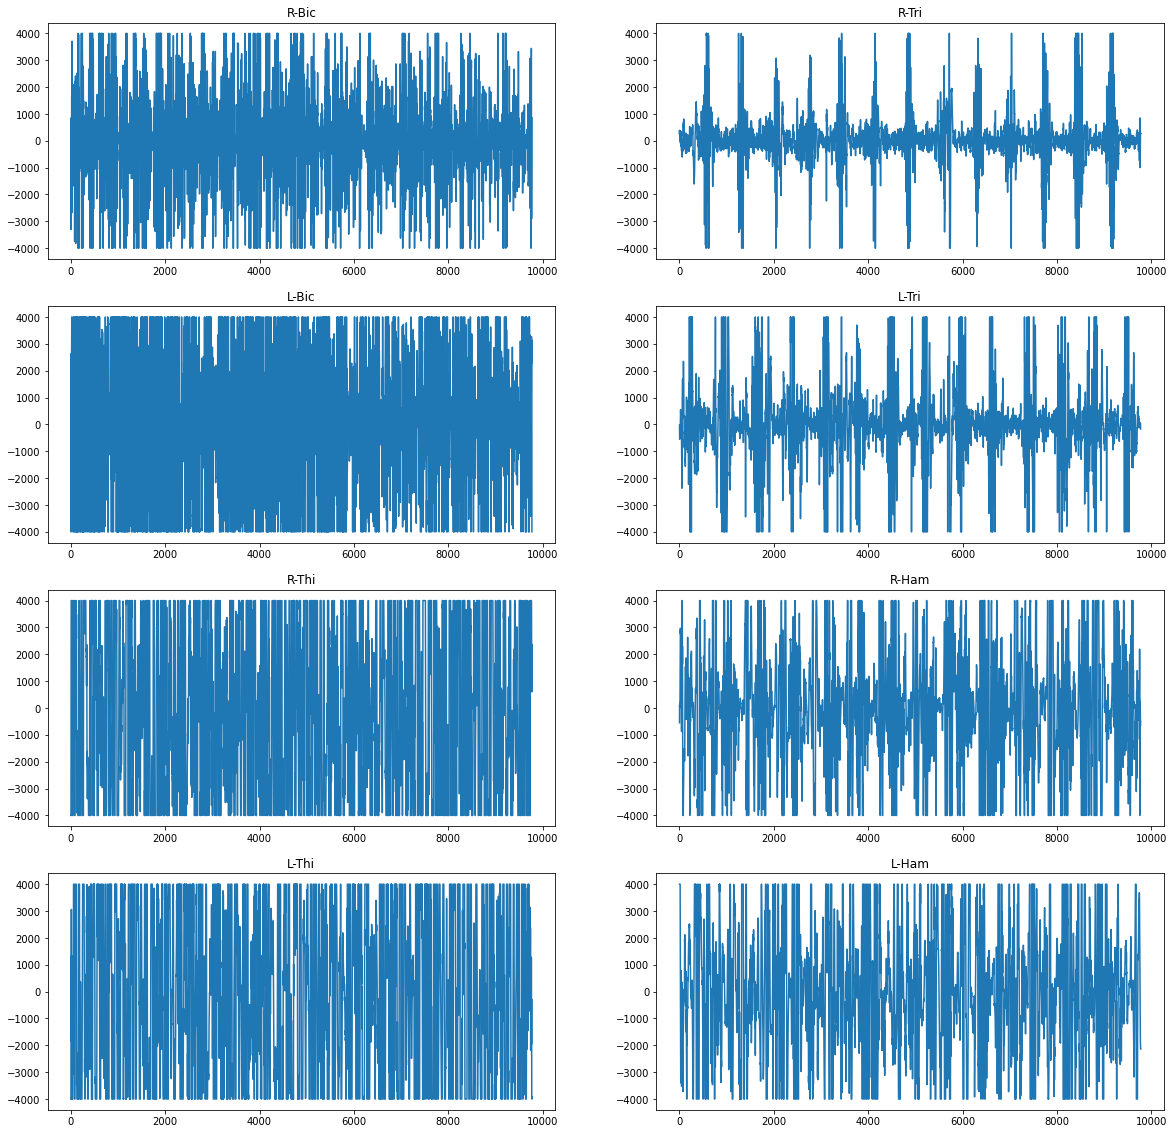

In [ ]:
num_rows = 4
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))

i=0
j=0
for index, col in enumerate(col_names):
    axs[i, j].plot(sub_sample_df[col])
    axs[i, j].set_title(col)
    j+=1
    if j%num_cols == 0:
        j=0
        i+=1

In [ ]:
df["type_cls_name"] = df["type"]+"_"+df["cls_name"]

In [ ]:
df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id,type_cls_name
0,-245,266,2615,-29,-4000,-549,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
1,-814,391,-22,-277,-4000,-130,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
2,-445,257,-3628,-428,-4000,97,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
3,-844,201,-4000,-498,-4000,62,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
4,-1996,233,-4000,-552,-4000,109,-4000,4000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797421,-284,-13,10,-60,13,-5,13,-13,Normal,19,Waving,sub4,Normal_Waving
797422,-431,10,4,-45,11,5,12,-13,Normal,19,Waving,sub4,Normal_Waving
797423,-562,9,1,-32,15,5,-11,-10,Normal,19,Waving,sub4,Normal_Waving
797424,-826,-12,2,-40,9,16,-50,-20,Normal,19,Waving,sub4,Normal_Waving


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df[col_names] = scaler.fit_transform(df[col_names])

In [ ]:
df

,R-Bic,R-Tri,L-Bic,L-Tri,R-Thi,R-Ham,L-Thi,L-Ham,type,cls_id,cls_name,sub_id,type_cls_name
0,0.469375,0.533250,0.826875,0.496375,0.000000,0.431375,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
1,0.398250,0.548875,0.497250,0.465375,0.000000,0.483750,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
2,0.444375,0.532125,0.046500,0.446500,0.000000,0.512125,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
3,0.394500,0.525125,0.000000,0.437750,0.000000,0.507750,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
4,0.250500,0.529125,0.000000,0.431000,0.000000,0.513625,0.000000,1.000000,Aggressive,0,Elbowing,sub1,Aggressive_Elbowing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797421,0.464500,0.498375,0.501250,0.492500,0.501625,0.499375,0.501625,0.498375,Normal,19,Waving,sub4,Normal_Waving
797422,0.446125,0.501250,0.500500,0.494375,0.501375,0.500625,0.501500,0.498375,Normal,19,Waving,sub4,Normal_Waving
797423,0.429750,0.501125,0.500125,0.496000,0.501875,0.500625,0.498625,0.498750,Normal,19,Waving,sub4,Normal_Waving
797424,0.396750,0.498500,0.500250,0.495000,0.501125,0.502000,0.493750,0.497500,Normal,19,Waving,sub4,Normal_Waving


In [ ]:
df.to_csv("/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/emg_dataset.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/emg_dataset.csv")

In [ ]:
################################################### ONLY ON ONE SUB TILL MORE MEMORY
df = df[df["sub_id"]=="sub1"]
################################################### ONLY ON ONE SUB TILL MORE MEMORY

In [ ]:
from collections import Counter

Counter(df["type_cls_name"])

Counter({'Aggressive_Elbowing': 9772,
         'Aggressive_Frontkicking': 9811,
         'Aggressive_Hamering': 10000,
         'Aggressive_Headering': 10000,
         'Aggressive_Kneeing': 10000,
         'Aggressive_Pulling': 9659,
         'Aggressive_Punching': 9637,
         'Aggressive_Pushing': 9676,
         'Aggressive_Sidekicking': 9829,
         'Aggressive_Slapping': 9788,
         'Normal_Bowing': 9830,
         'Normal_Clapping': 10000,
         'Normal_Handshaking': 9611,
         'Normal_Hugging': 9756,
         'Normal_Jumping': 10000,
         'Normal_Running': 9964,
         'Normal_Seating': 10000,
         'Normal_Standing': 9725,
         'Normal_Walking': 10000,
         'Normal_Waving': 10000})

In [ ]:
dataset_root = os.path.join('.', "/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset")

data_sub_folders = ["sub1", "sub2", "sub3", "sub4"] 
print(data_sub_folders)

agg_classes_dict = {
    "Elbowing": 0,
    "Frontkicking": 1,
    "Hamering": 2,
    "Headering": 3,
    "Kneeing": 4,
    "Pulling": 5,
    "Punching": 6,
    "Pushing": 7,
    "Sidekicking": 8,
    "Slapping": 9
}
norm_classes_dict = {
    "Bowing": 10,
    "Clapping": 11,
    "Handshaking": 12,
    "Hugging": 13,
    "Jumping": 14,
    "Running": 15,
    "Seating": 16,
    "Standing": 17,
    "Walking": 18,
    "Waving": 19
}

['sub1', 'sub2', 'sub3', 'sub4']


In [ ]:
y_col = "type_cls_name"
type_cls_name_unique = np.unique(df[y_col].values)
sub_id_unique = np.unique(df["sub_id"].values)

x_cols = ["R-Bic", "R-Tri", "L-Bic", "L-Tri", "R-Thi", "R-Ham", "L-Thi", "L-Ham"]

n_steps_in = 256

In [ ]:
def split_sequence(sequence, label, n_steps_in):
  data_x, data_y = [], []
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    if end_ix > len(sequence):
        break

    seq_x = sequence[i:end_ix]
    data_x.append(seq_x)
    data_y.append(label)
  return np.array(data_x), np.array(data_y)

In [ ]:
def get_samples(n_steps_in):
  X_dataset = []
  y_dataset = []
  for type_, category_folder, category_dict in zip(["Aggressive", "Normal"], ["Aggressive/txt/", "Normal/txt/"],
                                                   [agg_classes_dict, norm_classes_dict]):
      for cls, id in category_dict.items():
          for folder in data_sub_folders:
              txt_file = os.path.join(dataset_root, folder, category_folder, cls + '.txt')
              print("Processing txt_file: {}".format(txt_file))
              sequence = pd.read_csv(txt_file, delim_whitespace=True,
                                     header=None,
                                     dtype=col_dtypes).values
              label = type_+"_"+cls
              x, y = split_sequence(sequence, label, n_steps_in)
              X_dataset.extend(x)
              y_dataset.extend(y)
  return np.array(X_dataset), np.array(y_dataset)

In [ ]:
def load_x_y_dataset_windowing(tmp_df, n_steps_in):
  X_dataset = []
  y_dataset = []

  for s in sub_id_unique:
      for tc in type_cls_name_unique:
          mask = (tmp_df["sub_id"] == s) & (tmp_df["type_cls_name"] == tc)
          sub_values = tmp_df[mask][x_cols].values
          x, y = split_sequence(sub_values, tc, n_steps_in)
          X_dataset.extend(x)
          y_dataset.extend(y)
  return np.array(X_dataset), np.array(y_dataset)

In [ ]:
with tf.device('/device:GPU:0'):
  X_dataset, y_dataset = load_x_y_dataset_windowing(df, n_steps_in)
  #X_dataset, y_dataset = load_x_y_dataset(df, n_steps_in)
  X_dataset = X_dataset.reshape(-1, X_dataset.shape[2], X_dataset.shape[1])

In [ ]:
#del df

In [ ]:
X_dataset.shape, y_dataset.shape

((191958, 8, 256), (191958,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, shuffle=True, 
                                                    test_size=0.2, random_state=1, stratify=y_dataset)

In [ ]:
del X_dataset
del y_dataset

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153566, 8, 256), (153566,), (38392, 8, 256), (38392,))

In [ ]:
# X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
# X_test = X_train.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((153566, 8, 256), (153566,), (38392, 8, 256), (38392,))

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(np.unique(y_train))
num_classes

20

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
y_train.shape, y_test.shape

((153566, 20), (38392, 20))

In [ ]:
input_shape = (1, X_train.shape[2])
input_shape

(1, 256)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout

optimizer = Adam()

#num_models = 3
num_models = X_train.shape[1]
num_models

8

In [ ]:
def build_model_list(num_models):
    model_lst = [0] *num_models
    for i in range(num_models):
        model_lst[i] = Sequential()
        model_lst[i].add(LSTM(64, input_shape=input_shape, return_sequences=True))
        model_lst[i].add(LSTM(64))
        # model_lst[i].add(LSTM(16))
        # model_lst[i].add(LSTM(16))
        model_lst[i].add(Dense(8, activation='relu'))

        #model_lst[i].add(Dense(num_classes, activation='softmax'))
        #model_lst[i].compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    print('All Models Defined')
    return model_lst

In [ ]:
model_list = build_model_list(num_models)

All Models Defined


In [ ]:
model_list

In [ ]:
from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

def build_ensamble_model(model_lst):
    
    ensemble_inputs = [model.input for model in model_lst]
    ensemble_outputs = [model.output for model in model_lst]

    merge = concatenate(ensemble_outputs)
    hidden = Dense(128, activation='relu')(merge)
    hidden = Dense(64, activation='relu')(hidden)
    hidden = Dense(32, activation='relu')(hidden)
    hidden = Dropout(0.2)(hidden)
    output = Dense(num_classes, activation='softmax')(hidden)
    model = Model(inputs=ensemble_inputs, outputs=output)

    plot_model(model, show_shapes=True, to_file='model_graph.png')
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = build_ensamble_model(model_list)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 lstm_16_input (InputLayer)     [(None, 1, 256)]     0           []                               
                                                                                                  
 lstm_18_input (InputLayer)     [(None, 1, 256)]     0           []                               
                                                                                                  
 lstm_20_input (InputLayer)     [(None, 1, 256)]     0           []                               
                                                                                                  
 lstm_22_input (InputLayer)     [(None, 1, 256)]     0           []                               
                                                                                            

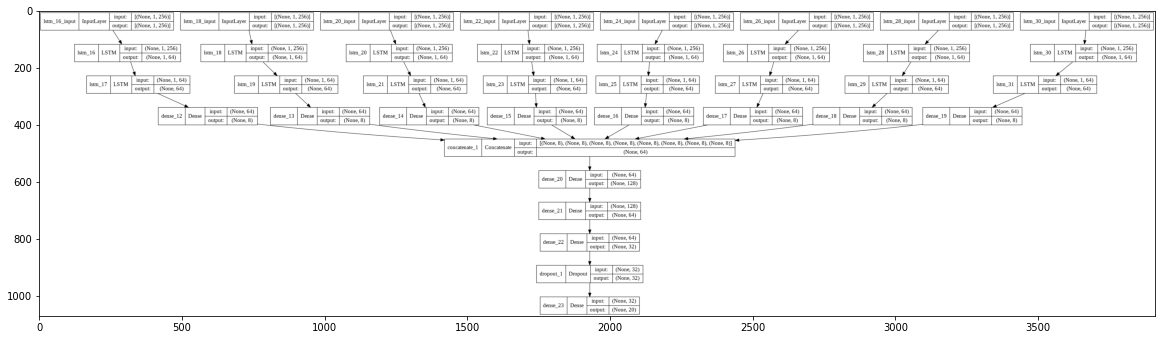

In [ ]:
plt.figure(figsize=(20,20))
model_img = plt.imread("model_graph.png")
plt.imshow(model_img)

In [ ]:
model_weights_file_path = "best_model_weights.hdf5"
num_epochs = 100
batch_size = 256
validation_ratio = 0.2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath=model_weights_file_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max", save_weights_only=True)
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=1, patience=20)
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, verbose=0, mode='max', min_delta=0.0001, cooldown=0, min_lr=0)

call_backs = [checkpoint, early_stopping, lr_reduce]

In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

    plt.figure(figsize=[8,6])
    plt.plot(history.history['accuracy'],'g',linewidth=3.0)
    plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

In [ ]:
def fit_stacked_model(model, 
                      input_x, 
                      input_y,
                      validation_ratio,
                      epochs,
                      batch_size,
                      call_backs):
    X = []
    for channle in range(input_x.shape[1]):
      X.append(input_x[:, channle].reshape(-1,1,input_x.shape[2]))

    history = model.fit(X, 
                        input_y,
                        validation_split=validation_ratio,
                        epochs=epochs, 
                        batch_size=batch_size,
                        callbacks=call_backs, 
                        verbose=1)
    return history

In [ ]:
import tensorflow as tf

with tf.device('/device:GPU:0'):
  history = fit_stacked_model(model, 
                              X_train,
                              y_train,
                              validation_ratio,
                              num_epochs,
                              batch_size,
                              call_backs)

Epoch 1/100
479/480 [============================>.] - ETA: 0s - loss: 0.7377 - accuracy: 0.6981
Epoch 00001: val_accuracy improved from -inf to 0.74715, saving model to best_model_weights.hdf5
480/480 [==============================] - 22s 46ms/step - loss: 0.7374 - accuracy: 0.6982 - val_loss: 0.6283 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 2/100
480/480 [==============================] - ETA: 0s - loss: 0.6412 - accuracy: 0.7290
Epoch 00002: val_accuracy did not improve from 0.74715
480/480 [==============================] - 22s 46ms/step - loss: 0.6412 - accuracy: 0.7290 - val_loss: 0.6709 - val_accuracy: 0.7406 - lr: 0.0010
Epoch 3/100
480/480 [==============================] - ETA: 0s - loss: 0.6416 - accuracy: 0.7312
Epoch 00003: val_accuracy did not improve from 0.74715
480/480 [==============================] - 22s 46ms/step - loss: 0.6416 - accuracy: 0.7312 - val_loss: 0.6298 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 4/100
480/480 [==============================] - ETA: 0s -

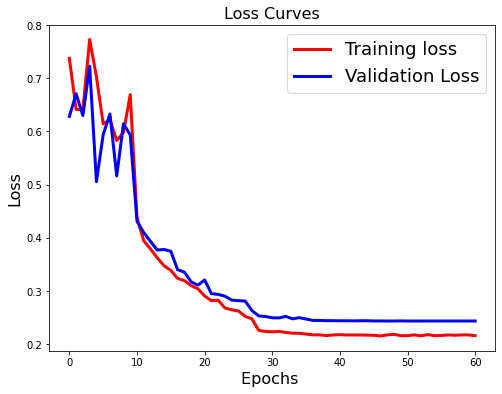

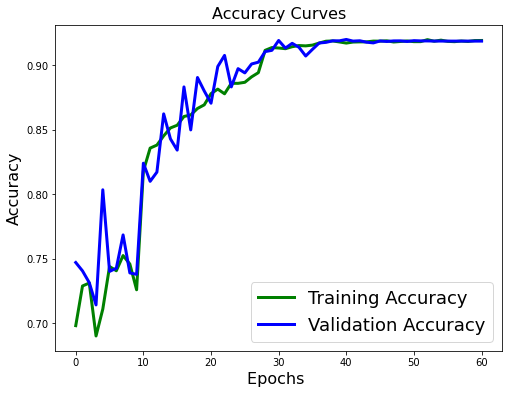

In [ ]:
plot_loss_accuracy(history)

In [ ]:
def predict_model(model, tmp_X_dataset):
    X = []
    for channle in range(len(model.input)):
      X.append(tmp_X_dataset[:, channle].reshape(-1,1,tmp_X_dataset.shape[2]))
    return model.predict(X, verbose=1)

In [ ]:
model_list = build_model_list(num_models)
saved_model = build_ensamble_model(model_list)
saved_model.load_weights(model_weights_file_path)

All Models Defined


In [ ]:
def evaluate_model(tmp_model, tmp_X_dataset, tmp_y_dataset):
  X = []
  for channle in range(len(model.input)):
    X.append(tmp_X_dataset[:, channle].reshape(-1,1,tmp_X_dataset.shape[2]))
  return tmp_model.evaluate(X, tmp_y_dataset, verbose=1)

In [ ]:
with tf.device('/device:GPU:0'):
  evaluate_model(saved_model, X_train, y_train)

4799/4799 [==============================] - 131s 15ms/step - loss: 0.1890 - accuracy: 0.9365


In [ ]:
with tf.device('/device:GPU:0'):
  evaluate_model(saved_model, X_test, y_test)

1200/1200 [==============================] - 18s 15ms/step - loss: 0.2364 - accuracy: 0.9238


In [ ]:
y_hat = None
with tf.device('/device:GPU:0'):
  y_hat = predict_model(saved_model, X_test)

In [ ]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_hat):
    print(classification_report(y_true, y_hat))

In [ ]:
y_hat = np.argmax(y_hat, axis=1)
y_hat

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
get_classification_report(y_test, y_hat)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1904
           1       0.96      0.94      0.95      1911
           2       0.98      0.97      0.98      1949
           3       0.94      0.94      0.94      1949
           4       0.95      0.95      0.95      1949
           5       0.99      0.98      0.98      1881
           6       0.96      0.98      0.97      1876
           7       0.99      0.98      0.99      1884
           8       0.96      0.96      0.96      1915
           9       0.97      0.97      0.97      1907
          10       0.95      0.93      0.94      1915
          11       1.00      1.00      1.00      1949
          12       0.78      0.86      0.82      1871
          13       0.99      0.99      0.99      1900
          14       0.99      1.00      0.99      1949
          15       0.96      0.98      0.97      1942
          16       0.72      0.52      0.60      1949
          17       0.62    

In [ ]:
def get_label_str(y_numeric):
  res = []
  for y in y_hat:
    res.append(label_encoder.classes_[y])
  return res

In [ ]:
y_hat = get_label_str(y_hat)

In [ ]:
y_hat

['Aggressive_Frontkicking',
 'Normal_Bowing',
 'Aggressive_Headering',
 'Normal_Handshaking',
 'Normal_Running',
 'Normal_Handshaking',
 'Aggressive_Kneeing',
 'Aggressive_Sidekicking',
 'Aggressive_Elbowing',
 'Aggressive_Kneeing',
 'Normal_Seating',
 'Normal_Standing',
 'Aggressive_Frontkicking',
 'Normal_Waving',
 'Aggressive_Frontkicking',
 'Normal_Hugging',
 'Normal_Clapping',
 'Normal_Running',
 'Aggressive_Sidekicking',
 'Aggressive_Elbowing',
 'Aggressive_Elbowing',
 'Aggressive_Frontkicking',
 'Normal_Seating',
 'Aggressive_Hamering',
 'Normal_Jumping',
 'Normal_Handshaking',
 'Aggressive_Punching',
 'Normal_Waving',
 'Normal_Standing',
 'Aggressive_Kneeing',
 'Aggressive_Elbowing',
 'Aggressive_Frontkicking',
 'Normal_Seating',
 'Aggressive_Pulling',
 'Normal_Running',
 'Normal_Walking',
 'Aggressive_Frontkicking',
 'Aggressive_Pulling',
 'Normal_Bowing',
 'Normal_Handshaking',
 'Aggressive_Elbowing',
 'Normal_Running',
 'Aggressive_Slapping',
 'Normal_Running',
 'Aggressive_

In [ ]:
! git clone https://github.com/kvoyager/GmdhPy.git

fatal: destination path 'GmdhPy' already exists and is not an empty directory.


In [ ]:
os.chdir('GmdhPy')


In [ ]:
! python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing GmdhPy.egg-info/PKG-INFO
writing dependency_links to GmdhPy.egg-info/dependency_links.txt
writing requirements to GmdhPy.egg-info/requires.txt
writing top-level names to GmdhPy.egg-info/top_level.txt
adding license file 'LICENSE.txt'
writing manifest file 'GmdhPy.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/gmdhpy
copying build/lib/gmdhpy/neuron.py -> build/bdist.linux-x86_64/egg/gmdhpy
copying build/lib/gmdhpy/data_preprocessing.py -> build/bdist.linux-x86_64/egg/gmdhpy
copying build/lib/gmdhpy/gmdh.py -> build/bdist.linux-x86_64/egg/gmdhpy
c

In [ ]:
! ls /content/GmdhPy/

build  examples  GmdhPy.egg-info  LICENSE.txt  README.md  setup.py
dist   gmdhpy	 __init__.py	  __pycache__  setup.cfg  tests


In [ ]:
#os.chdir("/content/")
os.getcwd()

'/content/GmdhPy'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/EMG_Signals/EMG_Dataset/emg_dataset.csv")


In [ ]:
################################################### ONLY ON ONE SUB TILL MORE MEMORY
mask = (df["sub_id"]=="sub1") & ((df["type_cls_name"]=="Aggressive_Elbowing") | (df["type_cls_name"]=="Normal_Bowing"))
df = df[mask]
################################################### ONLY ON ONE SUB TILL MORE MEMORY

In [ ]:
n_steps_in = 96

with tf.device('/device:GPU:0'):
  X_dataset, y_dataset = load_x_y_dataset_windowing(df, n_steps_in)

In [ ]:
del df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, shuffle=True, 
                                                    test_size=0.2, random_state=1, stratify=y_dataset)

In [ ]:
del X_dataset
del y_dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15529, 96, 8), (3883, 96, 8), (15529,), (3883,))

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1, X_test.shape[1]*X_test.shape[2])

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15529, 768), (3883, 768), (15529,), (3883,))

In [ ]:
from __future__ import print_function
from gmdhpy.gmdh import Classifier

model = Classifier(ref_functions=('linear_cov', 'quad'),
                      manual_best_neurons_selection=True,
                      min_best_neurons_count=30,
                      n_jobs='max')

with tf.device('/device:GPU:0'):
  model.fit(X_train, y_train)

/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
/content/GmdhPy/gmdhpy/neuron.py:153: RuntimeWarning: overflow encounter

In [ ]:
y_hat = model.predict(X_test)

get_classification_report(y_test, y_hat)